In [1]:
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import scipy
from scipy import interpolate
from scipy.sparse import diags
import scipy.sparse as sp

import matplotlib.tri as tri
import matplotlib.pyplot as plt

import pandas as pd

from multiprocessing import Pool
from tqdm import tqdm 

PI = math.pi

In [2]:
    
data1 = pd.read_csv('./C1d_center_time_series_10min.txt')
concnt1d = data1.values    
    
data2 = pd.read_csv('./C2d_center_time_series_10min.txt')
concnt2d = data2.values

In [3]:
data1['0'].shape


(287,)

In [4]:
i_10min = []
for i in np.arange(0,287,1):
    i_10min.append(i+1)
    

(257, 262)

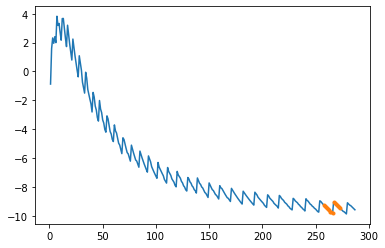

In [5]:
time = 257
plt.plot( i_10min, 100*(concnt1d-concnt2d)/concnt2d )
plt.plot( i_10min[time:time+16], 100*(concnt1d[time:time+16]-concnt2d[time:time+16])/concnt2d[time:time+16], '.' )
time, time+5

In [6]:
concnt1d_hour, concnt2d_hour = [],[]
i_hour = []
Dh = 6

for i in range(0,int(288/Dh),1):
    i_hour.append(i*Dh/6)
    
    concnt1d_hour.append( np.mean(concnt1d[i*Dh:i*Dh+Dh]) )
    concnt2d_hour.append( np.mean(concnt2d[i*Dh:i*Dh+Dh]) )

    print(i,i*Dh,i*Dh+Dh)

concnt1d_hour = np.array(concnt1d_hour)
concnt2d_hour = np.array(concnt2d_hour)

0 0 6
1 6 12
2 12 18
3 18 24
4 24 30
5 30 36
6 36 42
7 42 48
8 48 54
9 54 60
10 60 66
11 66 72
12 72 78
13 78 84
14 84 90
15 90 96
16 96 102
17 102 108
18 108 114
19 114 120
20 120 126
21 126 132
22 132 138
23 138 144
24 144 150
25 150 156
26 156 162
27 162 168
28 168 174
29 174 180
30 180 186
31 186 192
32 192 198
33 198 204
34 204 210
35 210 216
36 216 222
37 222 228
38 228 234
39 234 240
40 240 246
41 246 252
42 252 258
43 258 264
44 264 270
45 270 276
46 276 282
47 282 288


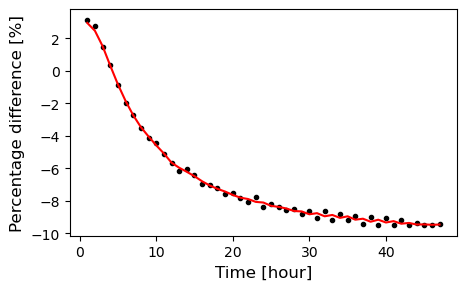

In [7]:
fig = plt.figure(figsize=(5, 3), dpi=100)

init = 1

x = i_hour[init::]
y = 100*(concnt1d_hour[init::]-concnt2d_hour[init::])/concnt2d_hour[init::]
plt.plot( x, y, 'k.' )


ymean = [(y[0]+y[1])/2]
for i in range(0,len(y)-2,1):
    #ymean.append( 0.5*y[i+1]+0.25*y[i]+0.25*y[i+2] )
    ymean.append( (y[i]+y[i+1]+y[i+2])/3 )
ymean.append( (y[-2]+y[-1])/2 )

plt.plot(x,ymean,'r-')

plt.ylabel('Percentage difference [%]', fontsize=12);
plt.xlabel('Time [hour]', fontsize=12);

In [9]:
# ymean